In [8]:
import sys
import os
#print(os.getcwd())
#print(sys.path)
sys.path.append('/Users/dannybensik/Google Drive/My Drive/Work/Dev/quant-pipeline')
#print(sys.path)

[*********************100%***********************]  1 of 1 completed

Fetching new data for SPY from 2018-01-01 to 2024-12-31...
Columns returned from data source: MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])
Cleaning data...
Saving data to ../data/raw_data.csv...



Matplotlib is building the font cache; this may take a moment.


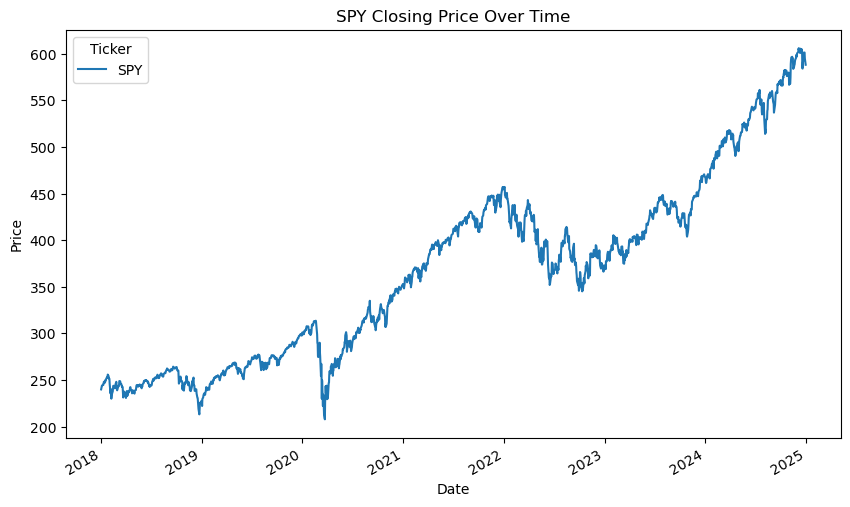

In [12]:
import importlib
import data_pipeline.data_pipeline
importlib.reload(data_pipeline.data_pipeline)
from data_pipeline.data_pipeline import DataPipeline

# Instantiate the pipeline
pipeline = DataPipeline(
    ticker="SPY",
    start_date="2018-01-01",
    end_date="2024-12-31"
)

# Fetch, clean, and save data
pipeline.fetch_data()
pipeline.clean_data()
pipeline.save_data()

# Quick Plot
import matplotlib.pyplot as plt
pipeline.data['Close'].plot(figsize=(10,6), title="SPY Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
